In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression
import string # string library
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import f1_score

First we need to import our training data from the CSV file provided.

In [2]:
train = pd.read_csv('/kaggle/input/edsa-sentiment-classification/train.csv')
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


Let's see the distribution of sentiments using a bar graph.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='sentiment'>

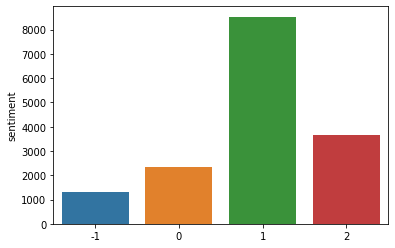

In [3]:
plot = train.sentiment.value_counts()
sns.barplot(plot.index,plot)

Let us separate the target from X variable.

In [4]:
y = train['sentiment']
x = train['message']

Next we can go ahead and do an initial clean of the tweet removing First we need to clean up our tweets to make them easier to understand for the ML algorithm. Here we define a function which takes in a tweet and returns the tweet with all URL's, line breaks, punctuation, numbers and capital letters removed.

In [5]:
def tweet_preprocessor(tweet):
    tweet = tweet.replace('\n', ' ') # remove line breaks
    tweet = re.sub(r"\bhttps://t.co/\w+", '', tweet) # remove URL's
    tweet = re.sub('\w*\d\w*', ' ', tweet) # remove numbers
    tweet = re.sub('[%s]' % re.escape(string.punctuation), ' ',   
            tweet.lower()) # remove capital letters and punctuation
    
    return tweet

x = [tweet_preprocessor(tweet) for tweet in x]

Now let us clean up the tweets using a tokenizer to ensure our model can understand them.

In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words='english')
X_vectorized = vectorizer.fit_transform(x)

Next let's split our data into training and testing sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=.3, shuffle=True, stratify=y, random_state=11)

Now let us train a model.

In [8]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

Then let us get the F1 score of the model we trained above, using our test data.

In [9]:
f1_score(y_test, rfc_pred, average='macro')

0.5440807873549547

Next we remove all retweets as our test set does not include any retweets.

In [10]:
train = train[(train.message.str[0:2] != 'rt')]
train.head()
print(train.shape)

(15819, 3)


Checking our tweets to see what they look like now.

In [11]:
print(train.message)

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object


In [12]:
test = pd.read_csv('/kaggle/input/edsa-sentiment-classification/test.csv')

This is just a placeholder to ensure I get the submission part correct.

In [13]:
ids = test["tweetid"]
submission_df = pd.DataFrame({'tweetid': ids})
submission_df = submission_df.assign(sentiment=1)
submission_df.to_csv('submission.csv',index=False)